In [0]:
!git clone --recursive https://github.com/Microsoft/LightGBM ; cd LightGBM
import os
os.chdir('LightGBM')
!mkdir build
os.chdir('build')
!apt-get install -qq cmake
!cmake -DUSE_GPU=1 ..
!make -j4

Cloning into 'LightGBM'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 13643 (delta 8), reused 6 (delta 3), pack-reused 13622
Receiving objects: 100% (13643/13643), 9.63 MiB | 25.42 MiB/s, done.
Resolving deltas: 100% (9753/9753), done.
Submodule 'include/boost/compute' (https://github.com/boostorg/compute) registered for path 'compute'
Cloning into '/content/LightGBM/compute'...
remote: Enumerating objects: 72, done.        
remote: Counting objects: 100% (72/72), done.        
remote: Compressing objects: 100% (47/47), done.        
remote: Total 21728 (delta 30), reused 44 (delta 19), pack-reused 21656        
Receiving objects: 100% (21728/21728), 8.53 MiB | 26.56 MiB/s, done.
Resolving deltas: 100% (17550/17550), done.
Submodule path 'compute': checked out '36c89134d4013b2e5e45bc55656a18bd6141995a'
-- The C compiler identification is GNU 7.4.0
-- The CXX compiler identification 

In [2]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
#%cd '/content/drive/My Drive/ta-lib'
#%cd ta-lib
import os
#os.chdir('/content/drive/My Drive/ta-lib') # Can't use !cd in co-lab
os.chdir('ta-lib') # Can't use !cd in co-lab
!./configure --prefix=/usr
#! '/content/drive/My Drive/ta-lib/configure' --prefix=/usr
!make
!make install
!pip install Ta-Lib

--2019-06-11 22:24:11--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 216.105.38.13
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|216.105.38.13|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2019-06-11 22:24:11--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 216.105.38.13
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: https://newcontinuum.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2019-06-11 22:24:12--  https://newcontinuum.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving newcon

In [2]:
%cd /content/LightGBM/python-package
!python3 setup.py install --gpu

[Errno 2] No such file or directory: '/content/LightGBM/python-package'
/content
python3: can't open file 'setup.py': [Errno 2] No such file or directory


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
!pip install optuna
!pip install joblib
!pip install lightgbm --install-option=--gpu

import lightgbm as lgb
import pickle
import matplotlib.pyplot as plt
from numba import jit, f8, i8, b1, void
import numpy as np
import pandas as pd
from multiprocessing import Pool, Value, Array
import multiprocessing as multi
from joblib import Parallel, delayed
import talib as ta
from datetime import datetime, timedelta, timezone
import sklearn.metrics
from functools import partial
import optuna
import joblib
from joblib import Parallel, delayed

     |████████████████████████████████| 81kB 5.3MB/s 
     |████████████████████████████████| 81kB 29.1MB/s 
     |████████████████████████████████| 1.0MB 47.0MB/s 
     |████████████████████████████████| 51kB 23.6MB/s 
     |████████████████████████████████| 102kB 30.8MB/s 
     |████████████████████████████████| 112kB 51.2MB/s 
     |████████████████████████████████| 460kB 51.5MB/s 
  Stored in directory: /root/.cache/pip/wheels/45/0e/07/84fd5bb2d1e820ba134f4a5c69474b887afdd0f34762b86792
  Stored in directory: /root/.cache/pip/wheels/de/cf/b3/0eb5c89ea6aa1b49cb41315f9ec139ada8cbffd575bf170d43
  Stored in directory: /root/.cache/pip/wheels/b3/7b/ae/5addd138cd8175503b9782737bada30d0c88310d08c106f9bf
  Stored in directory: /root/.cache/pip/wheels/92/f0/ac/2ba2972034e98971c3654ece337ac61e546bdeb34ca960dc8c
Successfully built optuna alembic Mako pyperclip
/usr/local/lib/python3.6/dist-packages/pip/_internal/commands/install.py:244: UserWarning: Disabling all use of wheels due to the use o

In [0]:
class OneMinData:
    def initialize(self):
        self.num_crypto_data = 0
        self.unix_time = []
        self.dt = []
        self.open = []
        self.high = []
        self.low = []
        self.close = []
        self.size = []
        self.ave_price = []
        self.ema = {}
        self.ema_ave = {}
        self.ema_kairi = {}
        self.ema_gra = {}
        self.dema = {}
        self.dema_ave = {}
        self.dema_kairi = {}
        self.dema_gra = {}
        self.midprice = {}
        self.rsi = {}
        self.momentum = {}
        self.momentum_ave = {}
        self.rate_of_change = {}
        self.williams_R = {}
        self.beta = {}
        self.tsf = {}
        self.correl = {}
        self.linear_reg = {}
        self.linear_reg_angle = {}
        self.linear_reg_intercept = {}
        self.linear_reg_slope = {}
        self.stdv = {}
        self.var = {}
        self.linear_reg_ave = {}
        self.linear_reg_angle_ave = {}
        self.linear_reg_intercept_ave = {}
        self.linear_reg_slope_ave = {}
        self.stdv_ave = {}
        self.var_ave = {}
        self.adx = {}
        self.aroon_os = {}
        self.cci = {}
        self.dx = {}
        self.macd = {}
        self.macdsignal = {}
        self.macdhist = {}
        self.macd_ave = {}
        self.macdsignal_ave = {}
        self.macdhist_ave = {}

        self.normalized_ave_true_range = []
        self.three_outside_updown = []
        self.breakway = []
        self.dark_cloud_cover = []
        self.dragonfly_doji = []
        self.updown_sidebyside_white_lines = []
        self.haramisen = []
        self.hikkake_pattern = []
        self.neck_pattern = []
        self.upsidedownside_gap_three_method = []
        self.sar = []
        self.bop = []
        self.future_side = []

    def cut_data(self, num_data):
        self.unix_time = self.unix_time[-num_data:]
        self.dt = self.dt[-num_data:]
        self.open = self.open[-num_data:]
        self.high = self.high[-num_data:]
        self.low = self.low[-num_data:]
        self.close = self.close[-num_data:]
        self.size = self.size[-num_data:]
        self.ave_price = self.ave_price[-num_data:]
        for k in self.ema: #assume term is same in all index except macd
            self.ema_kairi[k] = self.ema_kairi[k][-num_data:]
            self.ema_gra[k] = self.ema_gra[k][-num_data:]
            self.dema[k] = self.dema[k][-num_data:]
            self.dema_ave[k] = self.dema_ave[k][-num_data:]
            self.dema_kairi[k] = self.dema_kairi[k][-num_data:]
            self.dema_gra[k] = self.dema_gra[k][-num_data:]
            self.rsi[k] = self.rsi[k][-num_data:]
            self.midprice = self.midprice[k][-num_data:]
            self.momentum[k] = self.momentum[k][-num_data:]
            self.momentum_ave[k] = self.momentum_ave[k][-num_data:]
            self.rate_of_change[k] = self.rate_of_change[k][-num_data:]
            self.williams_R[k] = self.williams_R[k][-num_data:]
            self.beta[k] = self.beta[k][-num_data:]
            self.tsf[k] = self.tsf[k][-num_data:]
            self.correl[k] = self.correl[k][-num_data:]
            self.linear_reg[k] = self.linear_reg[k][-num_data:]
            self.linear_reg_angle[k] = self.linear_reg_angle[k][-num_data:]
            self.linear_reg_intercept[k] = self.linear_reg_intercept[k][-num_data:]
            self.linear_reg_slope[k] = self.linear_reg_slope[k][-num_data:]
            self.stdv[k] = self.stdv[k][-num_data:]
            self.var[k] = self.var[k][-num_data:]
            self.linear_reg_ave[k] = self.linear_reg_ave[k][-num_data:]
            self.linear_reg_angle_ave[k] = self.linear_reg_angle_ave[k][-num_data:]
            self.linear_reg_intercept_ave[k] = self.linear_reg_intercept_ave[k][-num_data:]
            self.linear_reg_slope_ave[k] = self.linear_reg_slope_ave[k][-num_data:]
            self.stdv_ave[k] = self.stdv_ave[k][-num_data:]
            self.var_ave[k] = self.var_ave[k][-num_data:]
            self.ema[k] = self.ema[k][-num_data:]
            self.ema_ave[k] = self.ema_ave[k][-num_data:]
            self.adx[k] = self.adx[k][-num_data:]
            self.aroon_os[k] = self.aroon_os[k][-num_data:]
            self.cci[k] = self.cci[k][-num_data:]
            self.dx[k] = self.dx[k][-num_data:]
            if k in self.macd:
                self.macd[k] = self.macd[k][-num_data:]
                self.macdsignal[k] = self.macdsignal[k][-num_data:]
                self.macdhist[k] = self.macdhist[k][-num_data:]
                self.macd_ave[k] = self.macd_ave[k][-num_data:]
                self.macdsignal_ave[k] = self.macdsignal_ave[k][-num_data:]
                self.macdhist_ave[k] = self.macdhist_ave[k][-num_data:]
        self.normalized_ave_true_range = self.normalized_ave_true_range[-num_data:]
        self.three_outside_updown = self.three_outside_updown[-num_data:]
        self.breakway = self.breakway[-num_data:]
        self.dark_cloud_cover = self.dark_cloud_cover[-num_data:]
        self.dragonfly_doji = self.dragonfly_doji[-num_data:]
        self.updown_sidebyside_white_lines = self.updown_sidebyside_white_lines[-num_data:]
        self.haramisen = self.haramisen[-num_data:]
        self.hikkake_pattern = self.hikkake_pattern[-num_data:]
        self.neck_pattern = self.neck_pattern[-num_data:]
        self.upsidedownside_gap_three_method = self.upsidedownside_gap_three_method[-num_data:]
        self.sar = self.sar[-num_data:]
        self.bop = self.bop[-num_data:]
        self.future_side = self.future_side[-num_data:]

    def del_data(self, num_remain_data):
        if len(self.unix_time) > num_remain_data:
            del self.unix_time[:-num_remain_data]
            del self.dt[:-num_remain_data]
            del self.open[:-num_remain_data]
            del self.high[:-num_remain_data]
            del self.low[:-num_remain_data]
            del self.close[:-num_remain_data]
            del self.size[:-num_remain_data]
            del self.ave_price[:-num_remain_data]
            for k in self.ema: #assume term is same in all index
                del self.ema_kairi[k][:-num_remain_data]
                del self.ema_gra[k][:-num_remain_data]
                del self.dema[k][:-num_remain_data]
                del self.dema_ave[k][:-num_remain_data]
                del self.dema_kairi[k][:-num_remain_data]
                del self.dema_gra[k][:-num_remain_data]
                del self.midprice[k][:-num_remain_data]
                del self.rsi[k][:-num_remain_data]
                del self.momentum[k][:-num_remain_data]
                del self.momentum_ave[k][:-num_remain_data]
                del self.rate_of_change[k][:-num_remain_data]
                del self.williams_R[k][:-num_remain_data]
                del self.beta[k][:-num_remain_data]
                del self.tsf[k][:-num_remain_data]
                del self.correl[k][:-num_remain_data]
                del self.linear_reg[k][:-num_remain_data]
                del self.linear_reg_angle[k][:-num_remain_data]
                del self.linear_reg_intercept[k][:-num_remain_data]
                del self.linear_reg_slope[k][:-num_remain_data]
                del self.stdv[k][:-num_remain_data]
                del self.var[k][:-num_remain_data]
                del self.linear_reg_ave[k][:-num_remain_data]
                del self.linear_reg_angle_ave[k][:-num_remain_data]
                del self.linear_reg_intercept_ave[k][:-num_remain_data]
                del self.linear_reg_slope_ave[k][:-num_remain_data]
                del self.stdv_ave[k][:-num_remain_data]
                del self.var_ave[k][:-num_remain_data]
                del self.ema[k][:-num_remain_data]
                del self.ema_ave[k][:-num_remain_data]
                del self.adx[k][:-num_remain_data]
                del self.aroon_os[k][:-num_remain_data]
                del self.cci[k][:-num_remain_data]
                del self.dx[k][:-num_remain_data]
                if k in self.macd:
                    del self.macd[k][:-num_remain_data]
                    del self.macdsignal[k][:-num_remain_data]
                    del self.macdhist[k][:-num_remain_data]
                    del self.macd_ave[k][:-num_remain_data]
                    del self.macdsignal_ave[k][:-num_remain_data]
                    del self.macdhist_ave[k][:-num_remain_data]
            del self.normalized_ave_true_range[:-num_remain_data]
            del self.three_outside_updown[:-num_remain_data]
            del self.breakway[:-num_remain_data]
            del self.dark_cloud_cover[:-num_remain_data]
            del self.dragonfly_doji[:-num_remain_data]
            del self.updown_sidebyside_white_lines[:-num_remain_data]
            del self.haramisen[:-num_remain_data]
            del self.hikkake_pattern[:-num_remain_data]
            del self.neck_pattern[:-num_remain_data]
            del self.upsidedownside_gap_three_method[:-num_remain_data]
            del self.sar[:-num_remain_data]
            del self.bop[:-num_remain_data]
            del self.future_side[:-num_remain_data]

    def add_and_pop(self, unix_time, dt, open, high, low, close, size):
        self.unix_time.append(unix_time)
        self.unix_time.pop(0)
        self.dt.append(dt)
        self.dt.pop(0)
        self.open.append(open)
        self.open.pop(0)
        self.high.append(high)
        self.high.pop(0)
        self.low.append(low)
        self.low.pop(0)
        self.close.append(close)
        self.close.pop(0)
        self.size.append(size)
        self.size.pop(0)

In [0]:

class SimTickData:
    def __init__(self):
        self.ut = []
        self.dt = []
        self.price = []
        self.prediction = []

In [0]:

def calc_all_index_wrap(term, open ,high ,low, close, avep):
    omd = OneMinData()
    omd.initialize()
    omd.ema[term] = OneMinMarketData.calc_ema(term, close)
    omd.ema_ave[term] = OneMinMarketData.calc_ema(term, avep)
    omd.ema_kairi[term] = OneMinMarketData.calc_ema_kairi(term, close)
    omd.ema_gra[term]= OneMinMarketData.calc_ema_gra(term, omd.ema[term])
    omd.dema[term]= OneMinMarketData.calc_dema(term,close)
    omd.dema_ave[term]= OneMinMarketData.calc_dema(term,avep)
    omd.dema_kairi[term] = OneMinMarketData.calc_dema_kairi(term, close)
    omd.dema_gra[term]= OneMinMarketData.calc_dema_gra(term, omd.dema[term])
    omd.midprice[term] = OneMinMarketData.calc_midprice(term, high, low)
    omd.momentum[term] = OneMinMarketData.calc_momentum(term, close)
    omd.momentum_ave[term] = OneMinMarketData.calc_momentum(term, avep)
    omd.rate_of_change[term] = OneMinMarketData.calc_rate_of_change(term, close)
    omd.rsi[term] = OneMinMarketData.calc_rsi(term, close)
    omd.williams_R[term] = OneMinMarketData.calc_williams_R(term,high, low, close)
    omd.beta[term] = OneMinMarketData.calc_beta(term, high, low)
    omd.tsf[term] = OneMinMarketData.calc_time_series_forecast(term, close)
    omd.correl[term] = OneMinMarketData.calc_correl(term, high, low)
    omd.linear_reg[term] = OneMinMarketData.calc_linear_reg(term, close)
    omd.linear_reg_angle[term] = OneMinMarketData.calc_linear_reg_angle(term, close)
    omd.linear_reg_intercept[term] = OneMinMarketData.calc_linear_reg_intercept(term, close)
    omd.linear_reg_slope[term] = OneMinMarketData.calc_linear_reg_slope(term, close)
    omd.stdv[term] = OneMinMarketData.calc_stdv(term, close)
    omd.var[term] = OneMinMarketData.calc_var(term, close)
    omd.linear_reg_ave[term] = OneMinMarketData.calc_linear_reg(term, avep)
    omd.linear_reg_angle_ave[term] = OneMinMarketData.calc_linear_reg_angle(term, avep)
    omd.linear_reg_intercept_ave[term] = OneMinMarketData.calc_linear_reg_intercept(term, avep)
    omd.linear_reg_slope_ave[term] = OneMinMarketData.calc_linear_reg_slope(term, avep)
    omd.stdv_ave[term] = OneMinMarketData.calc_stdv(term, avep)
    omd.var_ave[term] = OneMinMarketData.calc_var(term, avep)
    omd.adx[term] = OneMinMarketData.calc_adx(term, high, low,close)
    omd.aroon_os[term] = OneMinMarketData.calc_aroon_os(term, high, low)
    omd.cci[term] = OneMinMarketData.calc_cci(term, high, low,close)
    omd.dx[term] = OneMinMarketData.calc_dx(term, high, low,close)
    if term >= 10:
        omd.macd[term], omd.macdsignal[term], omd.macdhist[term] = OneMinMarketData.calc_macd(close, int(float(term)/2.0) ,term, int(float(term)/3.0))
        omd.macd[term] = list(omd.macd[term])
        omd.macdsignal[term] = list(omd.macdsignal[term])
        omd.macdhist[term] = list(omd.macdhist[term])
        omd.macd_ave[term], omd.macdsignal_ave[term], omd.macdhist_ave[term] = OneMinMarketData.calc_macd(avep, int(float(term)/2.0) ,term, int(float(term)/3.0))
        omd.macd_ave[term] = list(omd.macd_ave[term])
        omd.macdsignal_ave[term] = list(omd.macdsignal_ave[term])
        omd.macdhist_ave[term] = list(omd.macdhist_ave[term])
    return {term:omd}
    
    


class OneMinMarketData:
    @classmethod
    def initialize_for_bot(cls, num_term, window_term, future_side_period, future_side_kijun, initial_data_vol):
        cls.num_term = num_term
        cls.window_term = window_term
        cls.future_side_period = future_side_period
        cls.future_side_kijun = future_side_kijun
        cls.ohlc = cls.read_from_csv('/content/drive/My Drive/one_min_data.csv')
        cls.ohlc.del_data(initial_data_vol)
        #cls.__calc_all_index(False)
        cls.__calc_all_index2_main(False)


    @classmethod
    def update_for_bot(cls):
        cls.__calc_all_index2_main(True)


    @classmethod
    def read_from_csv(cls, file_name):
        ohlc = OneMinData()
        ohlc.initialize()
        df = pd.read_csv(file_name)
        ohlc.dt = list(map(lambda x: datetime.strptime(str(x),'%Y-%m-%d %H:%M:%S'),list(df['dt'])))
        ohlc.unix_time = list(df['unix_time'])
        ohlc.open = list(df['open'])
        ohlc.high = list(df['high'])
        ohlc.low = list(df['low'])
        ohlc.close = list(df['close'])
        ohlc.size = list(df['size'])
        return ohlc

    @classmethod
    def __calc_all_index(cls, flg_for_bot):
        cls.ohlc.ave_price = cls.calc_ave_price(cls.ohlc.open, cls.ohlc.high, cls.ohlc.low,cls.ohlc.close)
        num = round(cls.num_term / cls.window_term)
        if num >1:
            for i in range(num):
                term = cls.window_term * (i+ 1)
                if term > 1:
                    cls.ohlc.ema[term] = cls.calc_ema(term, cls.ohlc.close)
                    cls.ohlc.ema_ave[term] = cls.calc_ema(term, cls.ohlc.ave_price)
                    cls.ohlc.ema_kairi[term] = cls.calc_ema_kairi(term, cls.ohlc.close)
                    cls.ohlc.ema_gra[term]= cls.calc_ema_gra(term, cls.ohlc.ema[term])
                    cls.ohlc.dema[term]= cls.calc_dema(term,cls.ohlc.close)
                    cls.ohlc.dema_ave[term]= cls.calc_dema(term,cls.ohlc.ave_price)
                    cls.ohlc.dema_kairi[term] = cls.calc_dema_kairi(term, cls.ohlc.close)
                    cls.ohlc.dema_gra[term]= cls.calc_dema_gra(term, cls.ohlc.dema[term])
                    cls.ohlc.midprice[term] = cls.calc_midprice(term, cls.ohlc.high, cls.ohlc.low)
                    cls.ohlc.momentum[term] = cls.calc_momentum(term, cls.ohlc.close)
                    cls.ohlc.momentum_ave[term] = cls.calc_momentum(term, cls.ohlc.ave_price)
                    cls.ohlc.rate_of_change[term] = cls.calc_rate_of_change(term, cls.ohlc.close)
                    cls.ohlc.rsi[term] = cls.calc_rsi(term, cls.ohlc.close)
                    cls.ohlc.williams_R[term] = cls.calc_williams_R(term,cls.ohlc.high, cls.ohlc.low, cls.ohlc.close)
                    cls.ohlc.beta[term] = cls.calc_beta(term, cls.ohlc.high, cls.ohlc.low)
                    cls.ohlc.tsf[term] = cls.calc_time_series_forecast(term, cls.ohlc.close)
                    cls.ohlc.correl[term] = cls.calc_correl(term, cls.ohlc.high, cls.ohlc.low)
                    cls.ohlc.linear_reg[term] = cls.calc_linear_reg(term, cls.ohlc.close)
                    cls.ohlc.linear_reg_angle[term] = cls.calc_linear_reg_angle(term, cls.ohlc.close)
                    cls.ohlc.linear_reg_intercept[term] = cls.calc_linear_reg_intercept(term, cls.ohlc.close)
                    cls.ohlc.linear_reg_slope[term] = cls.calc_linear_reg_slope(term, cls.ohlc.close)
                    cls.ohlc.stdv[term] = cls.calc_stdv(term, cls.ohlc.close)
                    cls.ohlc.var[term] = cls.calc_var(term, cls.ohlc.close)
                    cls.ohlc.linear_reg_ave[term] = cls.calc_linear_reg(term, cls.ohlc.ave_price)
                    cls.ohlc.linear_reg_angle_ave[term] = cls.calc_linear_reg_angle(term, cls.ohlc.ave_price)
                    cls.ohlc.linear_reg_intercept_ave[term] = cls.calc_linear_reg_intercept(term, cls.ohlc.ave_price)
                    cls.ohlc.linear_reg_slope_ave[term] = cls.calc_linear_reg_slope(term, cls.ohlc.ave_price)
                    cls.ohlc.stdv_ave[term] = cls.calc_stdv(term, cls.ohlc.ave_price)
                    cls.ohlc.var_ave[term] = cls.calc_var(term, cls.ohlc.ave_price)
                    cls.ohlc.adx[term] = cls.calc_adx(term, cls.ohlc.high, cls.ohlc.low,cls.ohlc.close)
                    cls.ohlc.aroon_os[term] = cls.calc_aroon_os(term, cls.ohlc.high, cls.ohlc.low)
                    cls.ohlc.cci[term] = cls.calc_cci(term, cls.ohlc.high, cls.ohlc.low,cls.ohlc.close)
                    cls.ohlc.dx[term] = cls.calc_dx(term, cls.ohlc.high, cls.ohlc.low,cls.ohlc.close)
                    if term >= 10:
                        cls.ohlc.macd[term], cls.ohlc.macdsignal[term], cls.ohlc.macdhist[term] = cls.calc_macd(cls.ohlc.close, int(float(term)/2.0) ,term, int(float(term)/3.0))
                        cls.ohlc.macd[term] = list(cls.ohlc.macd[term])
                        cls.ohlc.macdsignal[term] = list(cls.ohlc.macdsignal[term])
                        cls.ohlc.macdhist[term] = list(cls.ohlc.macdhist[term])
                        cls.ohlc.macd_ave[term], cls.ohlc.macdsignal_ave[term], cls.ohlc.macdhist_ave[term] = cls.calc_macd(cls.ohlc.ave_price, int(float(term)/2.0) ,term, int(float(term)/3.0))
                        cls.ohlc.macd_ave[term] = list(cls.ohlc.macd_ave[term])
                        cls.ohlc.macdsignal_ave[term] = list(cls.ohlc.macdsignal_ave[term])
                        cls.ohlc.macdhist_ave[term] = list(cls.ohlc.macdhist_ave[term])
        cls.ohlc.normalized_ave_true_range = cls.calc_normalized_ave_true_range(cls.ohlc.high, cls.ohlc.low, cls.ohlc.close)
        cls.ohlc.three_outside_updown = cls.calc_three_outside_updown(cls.ohlc.open, cls.ohlc.high, cls.ohlc.low,cls.ohlc.close)
        cls.ohlc.breakway = cls.calc_breakway(cls.ohlc.open, cls.ohlc.high, cls.ohlc.low, cls.ohlc.close)
        cls.ohlc.dark_cloud_cover = cls.calc_dark_cloud_cover(cls.ohlc.open, cls.ohlc.high, cls.ohlc.low, cls.ohlc.close)
        cls.ohlc.dragonfly_doji = cls.calc_dragonfly_doji(cls.ohlc.open, cls.ohlc.high, cls.ohlc.low,cls.ohlc.close)
        cls.ohlc.updown_sidebyside_white_lines = cls.calc_updown_sidebyside_white_lines(cls.ohlc.open, cls.ohlc.high, cls.ohlc.low, cls.ohlc.close)
        cls.ohlc.haramisen = cls.calc_haramisen(cls.ohlc.open, cls.ohlc.high,cls.ohlc.low, cls.ohlc.close)
        cls.ohlc.hikkake_pattern = cls.calc_hikkake_pattern(cls.ohlc.open, cls.ohlc.high, cls.ohlc.low, cls.ohlc.close)
        cls.ohlc.neck_pattern = cls.calc_neck_pattern(cls.ohlc.open, cls.ohlc.high, cls.ohlc.low,cls.ohlc.close)
        cls.ohlc.upsidedownside_gap_three_method = cls.calc_upsidedownside_gap_three_method(cls.ohlc.open, cls.ohlc.high, cls.ohlc.low, cls.ohlc.close)
        cls.ohlc.sar = cls.calc_sar(cls.ohlc.high, cls.ohlc.low, 0.02, 0.2)
        cls.ohlc.bop = cls.calc_bop(cls.ohlc.open, cls.ohlc.high, cls.ohlc.low,cls.ohlc.close)
        if flg_for_bot==False:
            cls.ohlc.future_side = cls.calc_future_side(cls.future_side_period,cls.future_side_kijun,cls.ohlc)


            
    '''
    joblib multiprocessing
    '''
    @classmethod
    def __calc_all_index2_main(cls,flg_for_bot):
        cls.ohlc.ave_price = cls.calc_ave_price(cls.ohlc.open, cls.ohlc.high, cls.ohlc.low,cls.ohlc.close)
        '''
        num = round(cls.num_term / cls.window_term)
        args = range(num)
        n_cores = multi.cpu_count()
        p = Pool(processes=multiprocessing.cpu_count(),initializer=func1, initargs=())
        res = p.map(cls.calc_all_index2, args)
        '''
        
        terms = []
        n_cores = multi.cpu_count()
        num = int(round(cls.num_term / cls.window_term))
        for i in range(num):
            terms.append(cls.window_term * (i+1))
        omd_list = joblib.Parallel(n_jobs = n_cores)([delayed(calc_all_index_wrap)(term,cls.ohlc.open,cls.ohlc.high,cls.ohlc.low,cls.ohlc.close,cls.ohlc.ave_price) for term in terms])
        for omd in omd_list:
            key = int(list(omd.keys())[0])
            cls.ohlc.ema[key] = omd[key].ema[key]
            cls.ohlc.ema_ave[key] = omd[key].ema_ave[key]
            cls.ohlc.ema_kairi[key] = omd[key].ema_kairi[key]
            cls.ohlc.ema_gra[key]= omd[key].ema_gra[key]
            cls.ohlc.dema[key]= omd[key].dema[key]
            cls.ohlc.dema_ave[key]= omd[key].dema_ave[key]
            cls.ohlc.dema_kairi[key] = omd[key].dema_kairi[key]
            cls.ohlc.dema_gra[key]= omd[key].dema_gra[key]
            cls.ohlc.midprice[key] = omd[key].midprice[key]
            cls.ohlc.momentum[key] = omd[key].momentum[key]
            cls.ohlc.momentum_ave[key] = omd[key].momentum_ave[key]
            cls.ohlc.rate_of_change[key] = omd[key].rate_of_change[key]
            cls.ohlc.rsi[key] = omd[key].rsi[key]
            cls.ohlc.williams_R[key] = omd[key].williams_R[key]
            cls.ohlc.beta[key] = omd[key].beta[key]
            cls.ohlc.tsf[key] = omd[key].tsf[key]
            cls.ohlc.correl[key] = omd[key].correl[key]
            cls.ohlc.linear_reg[key] = omd[key].linear_reg[key]
            cls.ohlc.linear_reg_angle[key] = omd[key].linear_reg_angle[key]
            cls.ohlc.linear_reg_intercept[key] = omd[key].linear_reg_intercept[key]
            cls.ohlc.linear_reg_slope[key] = omd[key].linear_reg_slope[key]
            cls.ohlc.stdv[key] = omd[key].stdv[key]
            cls.ohlc.var[key] = omd[key].var[key]
            cls.ohlc.linear_reg_ave[key] = omd[key].linear_reg_ave[key]
            cls.ohlc.linear_reg_angle_ave[key] = omd[key].linear_reg_angle_ave[key]
            cls.ohlc.linear_reg_intercept_ave[key] = omd[key].linear_reg_intercept_ave[key]
            cls.ohlc.linear_reg_slope_ave[key] = omd[key].linear_reg_slope_ave[key]
            cls.ohlc.stdv_ave[key] = omd[key].stdv_ave[key]
            cls.ohlc.var_ave[key] = omd[key].var_ave[key]
            cls.ohlc.adx[key] = omd[key].adx[key]
            cls.ohlc.aroon_os[key] = omd[key].aroon_os[key]
            cls.ohlc.cci[key] = omd[key].cci[key]
            cls.ohlc.dx[key] = omd[key].dx[key]
            if key >= 10:
                cls.ohlc.macd[key] = omd[key].macd[key]
                cls.ohlc.macdsignal[key] = omd[key].macdsignal[key]
                cls.ohlc.macdhist[key] = omd[key].macdhist[key]
                cls.ohlc.macd_ave[key] = omd[key].macd_ave[key]
                cls.ohlc.macdsignal_ave[key] = omd[key].macdsignal_ave[key]
                cls.ohlc.macdhist_ave[key] = omd[key].macdhist_ave[key]
        cls.ohlc.normalized_ave_true_range = cls.calc_normalized_ave_true_range(cls.ohlc.high, cls.ohlc.low, cls.ohlc.close)
        cls.ohlc.three_outside_updown = cls.calc_three_outside_updown(cls.ohlc.open, cls.ohlc.high, cls.ohlc.low,cls.ohlc.close)
        cls.ohlc.breakway = cls.calc_breakway(cls.ohlc.open, cls.ohlc.high, cls.ohlc.low, cls.ohlc.close)
        cls.ohlc.dark_cloud_cover = cls.calc_dark_cloud_cover(cls.ohlc.open, cls.ohlc.high, cls.ohlc.low, cls.ohlc.close)
        cls.ohlc.dragonfly_doji = cls.calc_dragonfly_doji(cls.ohlc.open, cls.ohlc.high, cls.ohlc.low,cls.ohlc.close)
        cls.ohlc.updown_sidebyside_white_lines = cls.calc_updown_sidebyside_white_lines(cls.ohlc.open, cls.ohlc.high, cls.ohlc.low, cls.ohlc.close)
        cls.ohlc.haramisen = cls.calc_haramisen(cls.ohlc.open, cls.ohlc.high,cls.ohlc.low, cls.ohlc.close)
        cls.ohlc.hikkake_pattern = cls.calc_hikkake_pattern(cls.ohlc.open, cls.ohlc.high, cls.ohlc.low, cls.ohlc.close)
        cls.ohlc.neck_pattern = cls.calc_neck_pattern(cls.ohlc.open, cls.ohlc.high, cls.ohlc.low,cls.ohlc.close)
        cls.ohlc.upsidedownside_gap_three_method = cls.calc_upsidedownside_gap_three_method(cls.ohlc.open, cls.ohlc.high, cls.ohlc.low, cls.ohlc.close)
        cls.ohlc.sar = cls.calc_sar(cls.ohlc.high, cls.ohlc.low, 0.02, 0.2)
        cls.ohlc.bop = cls.calc_bop(cls.ohlc.open, cls.ohlc.high, cls.ohlc.low,cls.ohlc.close)
        if flg_for_bot==False:
            cls.ohlc.future_side = cls.calc_future_side(cls.future_side_period,cls.future_side_kijun,cls.ohlc)
    
            
            
    '''
    dema, adx, macdはnum_term * 2くらいnanが発生する
    print(df.isnull().sum())
    '''
    @classmethod
    def generate_df(cls):
        cut_size = cls.num_term * 2
        end = len(cls.ohlc.close) - cls.future_side_period
        df = pd.DataFrame()
        df = df.assign(dt=cls.ohlc.dt[cut_size:end])
        df = df.assign(open=np.array(cls.ohlc.open[cut_size:end], dtype=np.float32))
        df = df.assign(high=np.array(cls.ohlc.high[cut_size:end], dtype=np.float32))
        df = df.assign(low=np.array(cls.ohlc.low[cut_size:end], dtype=np.float32))
        df = df.assign(close=np.array(cls.ohlc.close[cut_size:end], dtype=np.float32))
        df = df.assign(ave_price=np.array(cls.ohlc.ave_price[cut_size:end], dtype=np.float32))
        df = df.assign(size=np.array(cls.ohlc.size[cut_size:end], dtype=np.float32))
        def __make_col_df(df, data, col_name):
            for k in data:
                col = col_name + str(k)
                df = df.assign(col=np.array(data[k][cut_size:end],dtype=np.float32))
                df.rename(columns={'col': col}, inplace=True)
            return df
        df = __make_col_df(df, cls.ohlc.ema, 'ema')
        df = __make_col_df(df, cls.ohlc.ema_ave, 'ema_ave')
        df = __make_col_df(df, cls.ohlc.ema_kairi,'ema_kairi')
        df = __make_col_df(df, cls.ohlc.dema_kairi,'dema_kairi')
        df = __make_col_df(df, cls.ohlc.ema_gra,'ema_gra')
        df = __make_col_df(df, cls.ohlc.dema, 'dema')
        df = __make_col_df(df, cls.ohlc.dema_ave, 'dema_ave')
        df = __make_col_df(df, cls.ohlc.dema_gra,'dema_gra')
        df = __make_col_df(df, cls.ohlc.midprice, 'midprice')
        df = __make_col_df(df, cls.ohlc.momentum, 'momentum')
        df = __make_col_df(df, cls.ohlc.momentum_ave, 'momentum_ave')
        df = __make_col_df(df, cls.ohlc.rate_of_change, 'rate_of_change')
        df = __make_col_df(df, cls.ohlc.rsi, 'rsi')
        df = __make_col_df(df, cls.ohlc.williams_R, 'williams_R')
        df = __make_col_df(df, cls.ohlc.beta, 'beta')
        df = __make_col_df(df, cls.ohlc.tsf, 'tsf')
        df = __make_col_df(df, cls.ohlc.correl, 'correl')
        df = __make_col_df(df, cls.ohlc.linear_reg, 'linear_reg')
        df = __make_col_df(df, cls.ohlc.linear_reg_angle, 'linear_reg_angle')
        df = __make_col_df(df, cls.ohlc.linear_reg_intercept, 'linear_reg_intercept')
        df = __make_col_df(df, cls.ohlc.linear_reg_slope, 'linear_reg_slope')
        df = __make_col_df(df, cls.ohlc.stdv, 'stdv')
        df = __make_col_df(df, cls.ohlc.var, 'var')
        df = __make_col_df(df, cls.ohlc.linear_reg_ave, 'linear_reg_ave')
        df = __make_col_df(df, cls.ohlc.linear_reg_angle_ave, 'linear_reg_angle_ave')
        df = __make_col_df(df, cls.ohlc.linear_reg_intercept_ave, 'linear_reg_intercept_ave')
        df = __make_col_df(df, cls.ohlc.linear_reg_slope_ave, 'linear_reg_slope_ave')
        df = __make_col_df(df, cls.ohlc.stdv_ave, 'stdv_ave')
        df = __make_col_df(df, cls.ohlc.var_ave, 'var_ave')
        df = __make_col_df(df, cls.ohlc.adx, 'adx')
        df = __make_col_df(df, cls.ohlc.aroon_os, 'aroon_os')
        df = __make_col_df(df, cls.ohlc.cci, 'cci')
        df = __make_col_df(df, cls.ohlc.dx, 'dx')
        df = __make_col_df(df, cls.ohlc.macd, 'macd')
        df = __make_col_df(df, cls.ohlc.macdsignal, 'macdsignal')
        df = __make_col_df(df, cls.ohlc.macdhist, 'macdhist')
        df = __make_col_df(df, cls.ohlc.macd_ave, 'macd_ave')
        df = __make_col_df(df, cls.ohlc.macdsignal_ave, 'macdsignal_ave')
        df = __make_col_df(df, cls.ohlc.macdhist_ave, 'macdhist_ave')
        df = df.assign(normalized_ave_true_range=np.array(cls.ohlc.normalized_ave_true_range[cut_size:end],dtype=np.float32))
        df = df.assign(three_outside_updown=cls.ohlc.three_outside_updown[cut_size:end])
        df = df.assign(breakway=cls.ohlc.breakway[cut_size:end])
        df = df.assign(dark_cloud_cover=cls.ohlc.dark_cloud_cover[cut_size:end])
        df = df.assign(dragonfly_doji=cls.ohlc.dragonfly_doji[cut_size:end])
        df = df.assign(updown_sidebyside_white_lines=cls.ohlc.updown_sidebyside_white_lines[cut_size:end])
        df = df.assign(haramisen=cls.ohlc.haramisen[cut_size:end])
        df = df.assign(hikkake_pattern=cls.ohlc.hikkake_pattern[cut_size:end])
        df = df.assign(neck_pattern=cls.ohlc.neck_pattern[cut_size:end])
        df = df.assign(upsidedownside_gap_three_method=cls.ohlc.upsidedownside_gap_three_method[cut_size:end])
        df = df.assign(sar=np.array(cls.ohlc.sar[cut_size:end],dtype=np.float32))
        df = df.assign(bop=np.array(cls.ohlc.bop[cut_size:end],dtype=np.float32))
        df = df.assign(future_side=cls.ohlc.future_side[cut_size:])
        print('future side unique val')
        print(df['future_side'].value_counts(dropna=False, normalize=True))
        return df

    @classmethod
    def generate_df_for_bot(cls):
        df = pd.DataFrame()
        df = df.assign(dt=cls.ohlc.dt[-1:])
        df = df.assign(open=cls.ohlc.open[-1:])
        df = df.assign(high=cls.ohlc.high[-1:])
        df = df.assign(low=cls.ohlc.low[-1:])
        df = df.assign(close=cls.ohlc.close[-1:])
        df = df.assign(ave_price=cls.ohlc.ave_price[-1:])
        df = df.assign(size=cls.ohlc.size[-1:])
        def __make_col_df(df, data, col_name):
            for k in data:
                col = col_name + str(k)
                df = df.assign(col=data[k][-1:])
                df.rename(columns={'col': col}, inplace=True)
            return df
        df = __make_col_df(df, cls.ohlc.ema, 'ema')
        df = __make_col_df(df, cls.ohlc.ema_ave, 'ema_ave')
        df = __make_col_df(df, cls.ohlc.ema_kairi, 'ema_kairi')
        df = __make_col_df(df, cls.ohlc.dema_kairi, 'dema_kairi')
        df = __make_col_df(df, cls.ohlc.ema_gra, 'ema_gra')
        df = __make_col_df(df, cls.ohlc.dema, 'dema')
        df = __make_col_df(df, cls.ohlc.dema_ave, 'dema_ave')
        df = __make_col_df(df, cls.ohlc.dema_gra, 'dema_gra')
        df = __make_col_df(df, cls.ohlc.midprice, 'midprice')
        df = __make_col_df(df, cls.ohlc.momentum, 'momentum')
        df = __make_col_df(df, cls.ohlc.momentum_ave, 'momentum_ave')
        df = __make_col_df(df, cls.ohlc.rate_of_change, 'rate_of_change')
        df = __make_col_df(df, cls.ohlc.rsi, 'rsi')
        df = __make_col_df(df, cls.ohlc.williams_R, 'williams_R')
        df = __make_col_df(df, cls.ohlc.beta, 'beta')
        df = __make_col_df(df, cls.ohlc.tsf, 'tsf')
        df = __make_col_df(df, cls.ohlc.correl, 'correl')
        df = __make_col_df(df, cls.ohlc.linear_reg, 'linear_reg')
        df = __make_col_df(df, cls.ohlc.linear_reg_angle, 'linear_reg_angle')
        df = __make_col_df(df, cls.ohlc.linear_reg_intercept, 'linear_reg_intercept')
        df = __make_col_df(df, cls.ohlc.linear_reg_slope, 'linear_reg_slope')
        df = __make_col_df(df, cls.ohlc.stdv, 'stdv')
        df = __make_col_df(df, cls.ohlc.var, 'var')
        df = __make_col_df(df, cls.ohlc.linear_reg_ave, 'linear_reg_ave')
        df = __make_col_df(df, cls.ohlc.linear_reg_angle_ave, 'linear_reg_angle_ave')
        df = __make_col_df(df, cls.ohlc.linear_reg_intercept_ave, 'linear_reg_intercept_ave')
        df = __make_col_df(df, cls.ohlc.linear_reg_slope_ave, 'linear_reg_slope_ave')
        df = __make_col_df(df, cls.ohlc.stdv_ave, 'stdv_ave')
        df = __make_col_df(df, cls.ohlc.var_ave, 'var_ave')
        df = __make_col_df(df, cls.ohlc.adx, 'adx')
        df = __make_col_df(df, cls.ohlc.aroon_os, 'aroon_os')
        df = __make_col_df(df, cls.ohlc.cci, 'cci')
        df = __make_col_df(df, cls.ohlc.dx, 'dx')
        df = __make_col_df(df, cls.ohlc.macd, 'macd')
        df = __make_col_df(df, cls.ohlc.macdsignal, 'macdsignal')
        df = __make_col_df(df, cls.ohlc.macdhist, 'macdhist')
        df = __make_col_df(df, cls.ohlc.macd_ave, 'macd_ave')
        df = __make_col_df(df, cls.ohlc.macdsignal_ave, 'macdsignal_ave')
        df = __make_col_df(df, cls.ohlc.macdhist_ave, 'macdhist_ave')
        df = df.assign(normalized_ave_true_range=cls.ohlc.normalized_ave_true_range[-1:])
        df = df.assign(three_outside_updown=cls.ohlc.three_outside_updown[-1:])
        df = df.assign(breakway=cls.ohlc.breakway[-1:])
        df = df.assign(dark_cloud_cover=cls.ohlc.dark_cloud_cover[-1:])
        df = df.assign(dragonfly_doji=cls.ohlc.dragonfly_doji[-1:])
        df = df.assign(updown_sidebyside_white_lines=cls.ohlc.updown_sidebyside_white_lines[-1:])
        df = df.assign(haramisen=cls.ohlc.haramisen[-1:])
        df = df.assign(hikkake_pattern=cls.ohlc.hikkake_pattern[-1:])
        df = df.assign(neck_pattern=cls.ohlc.neck_pattern[-1:])
        df = df.assign(sar=cls.ohlc.sar[-1:])
        df = df.assign(bop=cls.ohlc.bop[-1:])
        df = df.assign(upsidedownside_gap_three_method=cls.ohlc.upsidedownside_gap_three_method[-1:])
        return df

    @classmethod
    def calc_future_side(cls, future_side_period, future_side_kijun, ohlc):
        for i in range(len(ohlc.close) - future_side_period):
            buy_max = 0
            sell_max = 0
            for j in range(i, i + future_side_period):
                buy_max = max(buy_max, ohlc.high[j + 1] - ohlc.close[i])
                sell_max = max(sell_max, ohlc.close[i] - ohlc.low[j + 1])
            if buy_max >= future_side_kijun and sell_max >= future_side_kijun:
                ohlc.future_side.append('both')
            elif buy_max >= future_side_kijun and sell_max < future_side_kijun:
                ohlc.future_side.append('buy')
            elif buy_max < future_side_kijun and sell_max >= future_side_kijun:
                ohlc.future_side.append('sell')
            elif buy_max < future_side_kijun and sell_max < future_side_kijun:
                ohlc.future_side.append('no')
        return ohlc.future_side


    @classmethod
    def calc_ave_price(cls, open, high, low, close):
        return list(ta.AVGPRICE(np.array(open,dtype='f8'),np.array(high,dtype='f8'),np.array(low,dtype='f8'),np.array(close,dtype='f8')))
        

    @classmethod
    def calc_ema(cls, term, close):
        return list(ta.EMA(np.array(close,dtype='f8'), timeperiod=term))

    @classmethod
    def calc_ema_kairi(cls, term, close):
        kairi = []
        ema = cls.calc_ema(term, close)
        for i,em in enumerate(ema):
            if np.isnan(em):
                kairi.append(-1)
            else:
                kairi.append(100.0*(close[i] - em) / em)
        return kairi
    
    @classmethod
    def calc_dema_kairi(cls, term, close):
        kairi = []
        dema = cls.calc_dema(term, close)
        for i,em in enumerate(dema):
            if np.isnan(em):
                kairi.append(-1)
            else:
                kairi.append(100.0*(close[i] - em) / em)
        return kairi
    
    @classmethod
    def calc_ema_gra(cls, term, ema):
        diff = []
        for i in range(len(ema)):
            if ema[i] == np.nan:
                diff.append(np.nan)
            else:
                diff.append(ema[i] - ema[i-1])
        return diff
    
    @classmethod
    def calc_dema_gra(cls, term, dema):
        diff = []
        for i in range(len(dema)):
            if dema[i] == np.nan:
                diff.append(np.nan)
            else:
                diff.append(dema[i] - dema[i-1])
        return diff
    
    @classmethod
    def calc_dema(cls, term, close):
        return list(ta.DEMA(np.array(close,dtype='f8'), timeperiod=term))

    @classmethod
    def calc_adx(cls, term, high, low, close):
        return list(ta.ADX(np.array(high,dtype='f8'),np.array(low,dtype='f8'),np.array(close,dtype='f8'), timeperiod=term))
    
    @classmethod
    def calc_aroon_os(cls, term, high, low):
        return list(ta.AROONOSC(np.array(high,dtype='f8'),np.array(low,dtype='f8'), timeperiod=term))
    
    @classmethod
    def calc_cci(cls, term, high, low, close):
        return list(ta.CCI(np.array(high,dtype='f8'),np.array(low,dtype='f8'),np.array(close,dtype='f8'), timeperiod=term))
    
    @classmethod
    def calc_dx(cls, term, high, low, close):
        return list(ta.DX(np.array(high,dtype='f8'),np.array(low,dtype='f8'),np.array(close,dtype='f8'), timeperiod=term))
    
    @classmethod
    def calc_midprice(cls, term, high, low):
        return list(ta.MIDPRICE(np.array(high,dtype='f8'),np.array(low,dtype='f8'), timeperiod=term))
    
    
    @classmethod
    def calc_macd(cls, close, fastperiod=12, slowperiod=26, signalperiod=9):
        return ta.MACD(np.array(close,dtype='f8'),np.array(fastperiod,dtype='i8'),np.array(slowperiod,dtype='i8'), np.array(signalperiod,dtype='i8'))
    
    @classmethod
    def calc_momentum(cls, term, close):
        return list(ta.MOM(np.array(close,dtype='f8'), timeperiod=term))

    @classmethod
    def calc_rate_of_change(cls,term,close):
        return list(ta.ROC(np.array(close,dtype='f8'), timeperiod=term))

    @classmethod
    def calc_rsi(cls, term, close):
        return list(ta.RSI(np.array(close,dtype='f8'), timeperiod=term))

    @classmethod
    def calc_williams_R(cls, term, high, low, close):
        return list(ta.WILLR(np.array(high,dtype='f8'), np.array(low,dtype='f8'), np.array(close,dtype='f8'), timeperiod=term))

    @classmethod
    def calc_beta(cls, term, high, low):
        return list(ta.BETA(np.array(high,dtype='f8'), np.array(low,dtype='f8'), timeperiod=term))

    @classmethod
    def calc_time_series_forecast(cls, term, close):
        return list(ta.TSF(np.array(close,dtype='f8'), timeperiod=term))

    @classmethod
    def calc_correl(cls, term, high, low):
        return list(ta.CORREL(np.array(high,dtype='f8'), np.array(low,dtype='f8'), timeperiod=term))
    
    @classmethod
    def calc_linear_reg(cls, term, close):
        return list(ta.LINEARREG(np.array(close,dtype='f8'), timeperiod=term))

    @classmethod
    def calc_linear_reg_angle(cls, term, close):
        return list(ta.LINEARREG_ANGLE(np.array(close,dtype='f8'), timeperiod=term))
    
    
    @classmethod
    def calc_linear_reg_intercept(cls, term, close):
        return list(ta.LINEARREG_SLOPE(np.array(close,dtype='f8'), timeperiod=term))
    
    @classmethod
    def calc_linear_reg_slope(cls, term, close):
        return list(ta.LINEARREG_INTERCEPT(np.array(close,dtype='f8'), timeperiod=term))
    
    @classmethod
    def calc_stdv(cls, term, close):
        return list(ta.STDDEV(np.array(close,dtype='f8'), timeperiod=term, nbdev=1))
    
    @classmethod
    def calc_var(cls, term, close):
        return list(ta.VAR(np.array(close,dtype='f8'), timeperiod=term, nbdev=1))
    
    @classmethod
    def calc_normalized_ave_true_range(cls, high, low, close):
        return list(ta.NATR(np.array(high,dtype='f8'), np.array(low,dtype='f8'), np.array(close,dtype='f8')))

    @classmethod
    def calc_three_outside_updown(cls, open, high, low, close):
        return list(ta.CDL3OUTSIDE(np.array(open,dtype='f8'), np.array(high,dtype='f8'), np.array(low,dtype='f8'), np.array(close,dtype='f8')))

    @classmethod
    def calc_breakway(cls, open, high, low, close):
        return list(ta.CDLBREAKAWAY(np.array(open,dtype='f8'), np.array(high,dtype='f8'), np.array(low,dtype='f8'), np.array(close,dtype='f8')))

    @classmethod
    def calc_dark_cloud_cover(cls, open, high, low, close):
        return list(ta.CDLDARKCLOUDCOVER(np.array(open,dtype='f8'), np.array(high,dtype='f8'), np.array(low,dtype='f8'), np.array(close,dtype='f8'),penetration=0))

    @classmethod
    def calc_dragonfly_doji(cls, open, high, low, close):
        return list(ta.CDLDRAGONFLYDOJI(np.array(open,dtype='f8'), np.array(high,dtype='f8'), np.array(low,dtype='f8'), np.array(close,dtype='f8')))

    @classmethod
    def calc_updown_sidebyside_white_lines(cls, open, high, low, close):
        return list(ta.CDLGAPSIDESIDEWHITE(np.array(open,dtype='f8'), np.array(high,dtype='f8'), np.array(low,dtype='f8'), np.array(close,dtype='f8')))

    @classmethod
    def calc_haramisen(cls, open, high, low, close):
        return list(ta.CDLHARAMI(np.array(open,dtype='f8'), np.array(high,dtype='f8'), np.array(low,dtype='f8'), np.array(close,dtype='f8')))

    @classmethod
    def calc_hikkake_pattern(cls, open, high, low, close):
        return list(ta.CDLHIKKAKEMOD(np.array(open,dtype='f8'), np.array(high,dtype='f8'), np.array(low,dtype='f8'), np.array(close,dtype='f8')))

    @classmethod
    def calc_neck_pattern(cls, open, high, low, close):
        return list(ta.CDLINNECK(np.array(open,dtype='f8'), np.array(high,dtype='f8'), np.array(low,dtype='f8'), np.array(close,dtype='f8')))

    
    @classmethod
    def calc_sar(cls, high, low, accelation, maximum):
        return list(ta.SAR(np.array(high,dtype='f8'), np.array(low,dtype='f8'), np.array(accelation,dtype='f8'), np.array(maximum,dtype='f8')))
    
    @classmethod
    def calc_bop(cls, open ,high, low,close):
        return list(ta.BOP(np.array(open,dtype='f8'), np.array(high,dtype='f8'), np.array(low,dtype='f8'), np.array( close,dtype='f8')))
    
    @classmethod
    def calc_upsidedownside_gap_three_method(cls, open, high, low, close):
        return list(ta.CDLXSIDEGAP3METHODS(np.array(open,dtype='f8'), np.array(high,dtype='f8'), np.array(low,dtype='f8'), np.array(close,dtype='f8')))
    
    
    @classmethod
    def check_matched_index(cls, test_x):
        test = list(test_x['open'])
        op = cls.ohlc.open
        for i in range(len(op)):
            flg = True
            for j in range(30):
                if test[j] != op[i+j]:
                    flg = False
                    break
            if flg:
                return i
        print('no matche index found!')
        return -1

    @classmethod
    def generate_tick_pred_data(cls, prediction, start_ind): #assume index 0 of ohlc and prediction is matched
        tick = []
        dt = []
        ut = []
        stdata = SimTickData()
        start_dt = cls.ohlc.dt[0]
        start_ut = cls.ohlc.unix_time[0]
        pred = []
        split_num = 60
        cls.ohlc.del_data(len(cls.ohlc.close)-start_ind)
        for i in range(len(prediction)):
            om_tick = []
            if cls.ohlc.open[i] < cls.ohlc.close[i]:  # open, low, high, close
                ol = cls.ohlc.open[i] - cls.ohlc.low[i]
                lh = cls.ohlc.high[i] - cls.ohlc.low[i]
                hc = cls.ohlc.high[i] - cls.ohlc.close[i]
                sec_width = (ol + lh + hc) / split_num
                if sec_width > 0:
                    om_tick.extend(list(np.round(np.linspace(cls.ohlc.open[i], cls.ohlc.low[i], round(ol / sec_width)))))
                    om_tick.extend(list(np.round(np.linspace(cls.ohlc.low[i], cls.ohlc.high[i], round(lh / sec_width)))))
                    om_tick.extend(list(np.round(np.linspace(cls.ohlc.high[i], cls.ohlc.close[i], round(hc / sec_width)))))
                else:
                    om_tick.extend([tick[-1]] * split_num)
            else:  # open, high, low, close
                oh = cls.ohlc.high[i] - cls.ohlc.open[i]
                hl = cls.ohlc.high[i] - cls.ohlc.low[i]
                lc = cls.ohlc.close[i] - cls.ohlc.low[i]
                sec_width = (oh + hl + lc) / split_num
                if sec_width > 0:
                    om_tick.extend(list(np.round(np.linspace(cls.ohlc.open[i], cls.ohlc.high[i], round(oh / sec_width)))))
                    om_tick.extend(list(np.round(np.linspace(cls.ohlc.high[i], cls.ohlc.low[i], round(hl / sec_width)))))
                    om_tick.extend(list(np.round(np.linspace(cls.ohlc.low[i], cls.ohlc.close[i], round(lc / sec_width)))))
                else:
                    om_tick.extend([tick[-1]] * split_num)
            if split_num - len(om_tick) > 0:
                om_tick.extend([om_tick[-1] * (split_num - len(om_tick))])
            elif split_num - len(om_tick) < 0:
                del om_tick[-(len(om_tick) - split_num):]
            tick.extend(om_tick)
            ut.extend([start_ut + (j+1) for j in range(split_num)])
            dt.extend([start_dt+timedelta(seconds=k+1) for k in range(split_num)])
            start_ut = ut[-1]
            start_dt = dt[-1]
            if i ==0:
                pred.extend([0] * split_num)
            else:
                pred.extend([prediction[i-1]] * split_num)
        stdata.dt.extend(dt)
        stdata.ut.extend(ut)
        stdata.price.extend(tick)
        stdata.prediction.extend(pred)
        return stdata

In [0]:

class SimAccount:
    def __init__(self):
        self.__initialize_order()
        self.__initialize_holding()

        self.base_margin_rate = 1.2
        self.leverage = 4.0
        self.slip_page = 50
        self.force_loss_cut_rate = 0.5
        self.initial_asset = 15000
        self.order_cancel_delay = 1

        self.total_pl = 0
        self.realized_pl = 0
        self.current_pl = 0
        self.num_trade = 0
        self.num_win = 0
        self.win_rate = 0
        self.asset = self.initial_asset

        self.dt_log = []
        self.i_log = []
        self.order_log = []
        self.holding_log = []
        self.total_pl_log = []
        self.action_log = []
        self.performance_total_pl_log = []

        self.start_dt = ''
        self.end_dt = ''


    def __initialize_order(self):
        self.order_side = ''
        self.order_price = 0
        self.order_size = 0
        self.order_i = 0
        self.order_dt = ''
        self.order_ut = 0
        self.order_type = ''
        self.order_cancel = False
        self.order_expire = 0

    def __initialize_holding(self):
        self.holding_side = ''
        self.holding_price = 0
        self.holding_size = 0
        self.holding_i = 0
        self.holding_dt = ''
        self.holding_ut = 0

    def move_to_next(self,  i, dt, ut, tick_price):
        if self.start_dt == '':
            self.start_dt = dt
        self.__check_loss_cut(i, dt, ut, tick_price)
        self.__check_execution(i, dt, ut, tick_price)
        self.__check_cancel(i, dt, ut, tick_price)
        if self.holding_side != '':
            self.current_pl = (tick_price - self.holding_price) * self.holding_size if self.holding_side == 'buy' else (self.holding_price - tick_price) * self.holding_size
        else:
            self.current_pl = 0
        self.total_pl = self.realized_pl + self.current_pl
        self.performance_total_pl_log.append(self.total_pl)
        self.asset = self.initial_asset + self.total_pl
        #self.__add_log('i:'+str(i), i)

    def last_day_operation(self,i, dt, ut, tick_price):
        self.__check_loss_cut(i, dt, ut, tick_price)
        self.__check_execution(i, dt, ut, tick_price)
        self.__check_cancel(i, dt, ut, tick_price)
        if self.holding_side != '':
            self.realized_pl += (tick_price - self.holding_price) * self.holding_size if self.holding_side == 'buy' else (self.holding_price -tick_price) * self.holding_size
        self.total_pl = self.realized_pl
        self.num_trade += 1
        self.total_pl_log.append(self.total_pl)
        self.performance_total_pl_log.append(self.total_pl)
        if self.num_trade > 0:
            self.win_rate = self.num_win / self.num_trade
        self.__add_log('Sim Finished.',i,dt,ut,tick_price)
        self.end_dt = dt
        print('from dt={}, : to_dt={}, total p={}, num trade={}, win rate={}'.format(self.start_dt,self.end_dt,self.total_pl,self.num_trade,self.win_rate))

    def entry_order(self, side, price, size, type, expire, i, dt, ut, tick_price):
        if self.order_side == '':
            self.order_side = side
            self.order_price = price
            self.order_size = size
            self.order_i = i
            self.order_dt = dt
            self.order_ut = ut
            self.order_type = type  # limit, market
            self.order_cancel = False
            self.order_expire = expire
            self.__add_log('entry order'+side+' type='+type, i,dt,ut,tick_price)
        else:
            print('order is already exist!')
            self.__add_log('order is already exist!', i,dt,ut,tick_price)


    def __update_holding(self, side, price, size, i, dt, ut):
        self.holding_side = side
        self.holding_price = price
        self.holding_size = size
        self.holding_i = i
        self.holding_dt = dt
        self.holding_ut = ut

    def cancel_order(self,  i, dt, ut):
        if self.order_type != 'losscut' and self.order_cancel == False:
            self.order_cancel = True
            self.order_i = i
            self.order_dt = dt
            self.order_ut = ut


    def __check_cancel(self,i, dt, ut, tick_price):
        if self.order_cancel:
            if ut - self.order_ut >= self.order_cancel_delay:
                self.__initialize_order()
                self.__add_log('order cancelled.', i, dt, ut, tick_price)

    def __check_expiration(self,i, dt, ut, tick_price):
        if self.ticks.ut[i] - self.order_ut >= self.order_expire and self.order_type != 'market' and self.order_type != 'losscut':
            self.__initialize_order()
            self.__add_log('order expired.', i, dt, ut, tick_price)


    def __check_execution(self, i, dt, ut, tick_price):
        if ut - self.order_ut >= self.order_cancel_delay and self.order_side != '':
            if self.order_type == 'market' or self.order_type == 'losscut':
                self.__process_execution(tick_price,i, dt, ut, tick_price)
                self.__initialize_order()
            elif self.order_type == 'limit' and ((self.order_side == 'buy' and self.order_price >= tick_price) or (self.order_side == 'sell' and self.order_price <= tick_price)):
                self.__process_execution(self.order_price,i, dt, ut, tick_price)
                self.__initialize_order()
            elif self.order_type != 'market' and self.order_type != 'limit' and self.order_type != 'losscut':
                print('Invalid order type!' + self.order_type)
                self.__add_log('invalid order type!'+self.order_type, i,dt, ut, tick_price)

    def __process_execution(self, exec_price, i, dt, ut, tick_price):
        if self.order_side != '':
            if self.holding_side == '':  # no position
                self.__update_holding(self.order_side, exec_price, self.order_size, i, dt, ut)
                self.__add_log('New Entry:'+self.order_type, i,dt, ut, tick_price)
            else:
                if self.holding_side == self.order_side:  # order side and position side is matched
                    price = round(((self.holding_price * self.holding_size) + (exec_price * self.order_size)) / (self.order_size + self.holding_size))
                    self.__update_holding(self.holding_side, price, self.order_size + self.holding_size, i, dt, ut)
                    self.__add_log('Additional Entry:' + self.order_type, i, dt, ut, tick_price)
                elif self.holding_size > self.order_size:  # side is not matched and holding size > order size
                    self.__calc_executed_pl(exec_price, i)
                    self.__update_holding(self.holding_side,self.holding_price,self.holding_size - self.order_size,i, dt, ut)
                    self.__add_log('Exit Order (h>o):' + self.order_type, i, dt, ut, tick_price)
                elif self.holding_size == self.order_size:
                    self.__add_log('Exit Order (h=o):' + self.order_type, i, dt, ut, tick_price)
                    self.__calc_executed_pl(exec_price, i)
                    self.__initialize_holding()
                else:  # in case order size is bigger than holding size
                    self.__calc_executed_pl(exec_price, i)
                    self.__add_log('Exit & Entry Order::' + self.order_type, i, dt, ut, tick_price)
                    self.__update_holding(self.order_side, exec_price, self.order_size - self.holding_size, i, dt, ut)


    def __calc_executed_pl(self,exec_price,i): #assume all order size was executed
        pl = (exec_price - self.holding_price - self.slip_page ) * self.order_size if self.holding_side == 'buy' else (self.holding_price - exec_price - self.slip_page) * self.order_size
        self.realized_pl += round(pl)
        self.num_trade += 1
        if pl >0:
            self.num_win +=1

    def __check_loss_cut(self,  i, dt, ut, tick_price):
        if self.holding_side != '' and self.order_type !='losscut':
            req_collateral = self.holding_size * tick_price / self.leverage
            pl = tick_price - self.holding_price if self.holding_side == 'buy' else self.holding_price - tick_price
            pl = pl * self.holding_size
            margin_rate = (self.initial_asset + self.realized_pl + pl) / req_collateral
            if margin_rate <= self.force_loss_cut_rate:
                self.__force_exit(i, dt, ut)
                self.__add_log('Loss cut postion! margin_rate=' + str(margin_rate), i, dt, ut, tick_price)

    def __force_exit(self,  i, dt, ut):
        self.order_side = 'buy' if self.holding_side == 'sell' else 'sell'
        self.order_size = self.holding_size
        self.order_type = 'losscut'
        self.order_i = i
        self.order_dt = dt
        self.order_ut = ut
        self.order_cancel = False
        self.order_expire = 86400

    def __add_log(self, log, i, dt, ut, tick_price):
        self.total_pl_log.append(self.total_pl)
        self.action_log.append(log)
        self.holding_log.append(self.holding_side + ' @' + str(self.holding_price) + ' x' + str(self.holding_size))
        self.order_log.append(self.order_side + ' @' + str(self.order_price) + ' x' + str(self.order_size) + ' cancel=' + str(self.order_cancel) + ' type=' + self.order_type)
        self.i_log.append(i)
        self.dt_log.append(dt)
#        print('i={},dt={},action={},holding side={}, holding price={},holding size={},order side={},order price={},order size={},pl={},num_trade={}'.format(i, tick_price,log,self.holding_side,self.holding_price,self.holding_size,self.order_side,self.order_price,self.order_size,self.total_pl,self.num_trade))

In [0]:
class Strategy:
    @classmethod
    def model_prediction(cls, pl_kijun, stdata, i, ac):
        dd = DecisionData()
        pred_side = ''
        if stdata.prediction[i] == 1:
            pred_side = 'buy'
        elif stdata.prediction[i] == 2:
            pred_side = 'sell'
        elif stdata.prediction[i] == 0:
            pred_side = 'no'
        elif stdata.prediction[i] == 3:
            pred_side = 'both'
        
        if ac.holding_side == '' and ac.order_side == '' and (pred_side == 'buy' or pred_side == 'sell') : #no position no order
            dd.set_decision(pred_side, 0,cls.__calc_opt_size(stdata.price[i], ac), 'market', False, 10)
        elif (ac.holding_side == 'buy' or ac.holding_side == 'sell') and (pred_side =='buy' or pred_side == 'sell') and \
                ac.holding_side != pred_side and ac.order_side != '' and ac.order_side != ac.holding_side and ac.order_type =='limit': #holding side != pred side and pl ordering -> cancel pl order
            dd.set_decision(pred_side,0, 0,'', True, 10) #cancel order
        elif (ac.holding_side == 'buy' or ac.holding_side == 'sell') and (pred_side =='buy' or pred_side == 'sell') and \
                ac.holding_side != pred_side and ac.order_side =='':
            dd.set_decision(pred_side, 0,ac.holding_size + cls.__calc_opt_size(stdata.price[i], ac), 'market', False, 10) #exit and re-entry
        elif ac.holding_side != '' and ac.order_side =='': #place pl order
            dd.set_decision('buy' if ac.holding_side =='sell' else 'sell', ac.holding_price + pl_kijun if ac.holding_side == 'buy' else ac.holding_price - pl_kijun,
                            ac.holding_size,'limit',False,360000)
        return dd
    
    
    @classmethod
    def ema_trend_follow(cls, stdata, i, ac):
        dd = DecisionData()
        pred_side = 'buy' if stdata.prediction[i] > 0 else 'sell'
        if ac.holding_side == '' and ac.order_side == '' and (pred_side == 'buy' or pred_side == 'sell') : #no position no order
            dd.set_decision(pred_side, 0,cls.__calc_opt_size(stdata.price[i], ac), 'market', False, 10)
        elif (ac.holding_side == 'buy' or ac.holding_side == 'sell') and (pred_side =='buy' or pred_side == 'sell') and \
                ac.holding_side != pred_side and ac.order_side =='':
            dd.set_decision(pred_side, 0,ac.holding_size + cls.__calc_opt_size(stdata.price[i], ac), 'market', False, 10) #exit and re-entry
        return dd
        
    @classmethod
    def ema_trend_contrarian(cls, stdata, i, ac):
        dd = DecisionData()
        pred_side = 'sell' if stdata.prediction[i] > 0 else 'buy'
        if ac.holding_side == '' and ac.order_side == '' and (pred_side == 'buy' or pred_side == 'sell') : #no position no order
            dd.set_decision(pred_side, 0,cls.__calc_opt_size(stdata.price[i], ac), 'market', False, 10)
        elif (ac.holding_side == 'buy' or ac.holding_side == 'sell') and (pred_side =='buy' or pred_side == 'sell') and \
                ac.holding_side != pred_side and ac.order_side =='':
            dd.set_decision(pred_side, 0,ac.holding_size + cls.__calc_opt_size(stdata.price[i], ac), 'market', False, 10) #exit and re-entry
        return dd
            
            
    @classmethod
    def __calc_opt_size(cls, price, ac):
        return 0.01
#        return round((ac.asset * ac.leverage) / (price * 1.0 * ac.base_margin_rate), 2)

class DecisionData:
    def __init__(self):
        self.side = ''
        self.size = 0
        self.price = 0
        self.type = 0
        self.cancel = False
        self.expire = 0  #sec

    def set_decision(self, side, price, size, type, cancel, expire):
        self.side = side
        self.price = price
        self.size = size
        self.type = type
        self.cancel = cancel
        self.expire = expire

In [0]:
'''
sim levelの最適化：
loss cut, pt, 

'''

class Sim:
    @classmethod
    def sim_lgbmodel(cls, stdata, pl_kijun, ac):
        print('sim length:'+str(stdata.dt[0]) + str(stdata.dt[-1]))
        for i in range(len(stdata.prediction)-1):
            dd = Strategy.model_prediction(pl_kijun, stdata,i,ac)
            if dd.cancel:
                ac.cancel_order(i, stdata.dt[i],stdata.ut[i])
            elif dd.side != '':
                ac.entry_order(dd.side,dd.price,dd.size,dd.type,dd.expire,i,stdata.dt[i],stdata.ut[i],stdata.price[i])
            ac.move_to_next(i,stdata.dt[i],stdata.ut[i],stdata.price[i])
        ac.last_day_operation(len(stdata.prediction)-1,stdata.dt[len(stdata.prediction)-1],stdata.ut[len(stdata.prediction)-1],stdata.price[len(stdata.prediction)-1])
        return ac
    
    @classmethod
    def sim_ema_trend_follow(cls, stdata, ac):
        print('sim length:'+str(stdata.dt[0]) + str(stdata.dt[-1]))
        for i in range(len(stdata.prediction)-1):
            dd = Strategy.ema_trend_follow(stdata,i,ac)
            if dd.side != '':
                ac.entry_order(dd.side,dd.price,dd.size,dd.type,dd.expire,i,stdata.dt[i],stdata.ut[i],stdata.price[i])
            ac.move_to_next(i,stdata.dt[i],stdata.ut[i],stdata.price[i])
        ac.last_day_operation(len(stdata.prediction)-1,stdata.dt[len(stdata.prediction)-1],stdata.ut[len(stdata.prediction)-1],stdata.price[len(stdata.prediction)-1])
        return ac
    
    
    @classmethod
    def sim_ema_trend_contrarian(cls, stdata, ac):
        print('sim length:'+str(stdata.dt[0]) + str(stdata.dt[-1]))
        for i in range(len(stdata.prediction)-1):
            dd = Strategy.ema_trend_contrarian(stdata,i,ac)
            if dd.side != '':
                ac.entry_order(dd.side,dd.price,dd.size,dd.type,dd.expire,i,stdata.dt[i],stdata.ut[i],stdata.price[i])
            ac.move_to_next(i,stdata.dt[i],stdata.ut[i],stdata.price[i])
        ac.last_day_operation(len(stdata.prediction)-1,stdata.dt[len(stdata.prediction)-1],stdata.ut[len(stdata.prediction)-1],stdata.price[len(stdata.prediction)-1])
        return ac
    
    @classmethod
    def sim_ema_tftc_switch(cls, stdata, ac, pl_sma_term):
        print('sim length:'+str(stdata.dt[0]) + str(stdata.dt[-1]))
        tf_ac = SimAccount()
        tc_ac = SimAccount()
        tf_pl_sma = []
        tc_pl_sma = []
        tf_pl_sum = 0
        tc_pl_sum = 0
        sim_min_count = 60
        switch_flg = 0 #0:tf, 1:tc
        for i in range(len(stdata.prediction)-1):
            #sim for tf
            dd = Strategy.ema_trend_follow(stdata,i,tf_ac)
            if dd.side != '':
                tf_ac.entry_order(dd.side,dd.price,dd.size,dd.type,dd.expire,i,stdata.dt[i],stdata.ut[i],stdata.price[i])
            tf_ac.move_to_next(i,stdata.dt[i],stdata.ut[i],stdata.price[i])
            #sim for tc
            dd = Strategy.ema_trend_contrarian(stdata,i,tc_ac)
            if dd.side != '':
                tc_ac.entry_order(dd.side,dd.price,dd.size,dd.type,dd.expire,i,stdata.dt[i],stdata.ut[i],stdata.price[i])
            tc_ac.move_to_next(i,stdata.dt[i],stdata.ut[i],stdata.price[i])
        return ac

In [0]:
import lightgbm as lgb
from sklearn import datasets
from sklearn.model_selection import train_test_split

from numba import jit
import numpy as np
import pandas as pd


class LgbModel:
    @jit
    def generate_data(self, df:pd.DataFrame, test_size=0.2):
        dff = df
        dff['future_side'] = dff['future_side'].map({'no':0, 'buy':1, 'sell':2, 'both':3}).astype(int)
        #dff = dff.drop(['dt','open','high','low','close','size'],axis = 1)
        dff = dff.drop(['dt','size'],axis = 1)
        size = int(round(dff['future_side'].count() * (1-test_size)))
        train_x = dff.drop('future_side',axis=1).iloc[0:size]
        train_y = dff['future_side'].iloc[0:size]
        test_x = dff.drop('future_side',axis=1).iloc[size:]
        test_y = dff['future_side'].iloc[size:]
#        print('train length='+str(len(train_y)))
#        print('test length='+str(len(test_y)))
        return train_x, test_x, train_y, test_y
    
    @jit
    def train(self, train_x, train_y):
        print('training data description')
        print('train_x:',train_x.shape)
        print('train_y:',train_y.shape)
        train = lgb.Dataset(train_x.values.astype(np.float32), train_y.values.astype(np.float32))
        lgbm_params = {
        'objective': 'multiclass',
        'num_class': 4,
        }
        model = lgb.train(lgbm_params, train)
        return model
    
    @jit
    def train_params(self, train_x, train_y, params):
        print('training data description')
        print('train_x:',train_x.shape)
        print('train_y:',train_y.shape)
        train = lgb.Dataset(train_x.values.astype(np.float32), train_y.values.astype(np.float32))
        model = lgb.train(params, train)
        return model
    
    def prediction(self, model, test_x, pred_kijun):
        prediction = []
        pval = model.predict(test_x, num_iteration=model.best_iteration)
        for p in pval:
            if p[1] > pred_kijun and (p[0] < 1- pred_kijun and p[2] < 1-pred_kijun and p[3] < 1-pred_kijun):
                prediction.append(1)
            elif p[2] > pred_kijun and (p[0] < 1- pred_kijun and p[1] < 1-pred_kijun and p[3] < 1-pred_kijun):
                prediction.append(2)
            elif p[3] > pred_kijun and (p[0] < 1- pred_kijun and p[1] < 1-pred_kijun and p[2] < 1-pred_kijun):
                prediction.append(3)
            else:
                prediction.append(0)
        return prediction
                
    def prediction2(self, model, test_x):
        prediction = []
        pval = model.predict(test_x, num_iteration=model.best_iteration)
        for p in pval:
            prediction.append(p.argmax())
        return prediction

    @jit
    def calc_buysell_accuracy(self, predictions, test_y):
        num = predictions.count(1) + predictions.count(2)
        matched = 0
        y = np.array(test_y)
        for i in range(len(predictions)):
            if predictions[i] == 1 and y[i] == 1 or predictions[i] == 2 and y[i] == 2:
                matched += 1
        if num >0:
            return float(matched) / float(num)
        else:
            return 0
        

In [11]:

class OptuningAccuracy:
    def objective(trial):
        params = {'objective': 'multiclass','num_class': 4} #,'device' : 'gpu','verbose' : 0
        params['boosting'] = trial.suggest_categorical('boosting', ['gbdt',  'dart'])
        params['learning_rate'] = trial.suggest_uniform('learning_rate',1e-3, 1e-1)
        params['max_bin'] = trial.suggest_int('max_bin', 1, 300)
        params['num_leaves'] = trial.suggest_int('num_leaves', 1, 100)
        params['min_data_in_leaf'] = trial.suggest_int('min_data_in_leaf', 0, 200)
        params['min_sum_hessian_in_leaf'] = trial.suggest_uniform('min_sum_hessian_in_leaf',1e-5, 1e+1)
        params['bagging_fraction'] = trial.suggest_uniform('bagging_fraction',1e-4, 1)
        params['bagging_freq'] = trial.suggest_int('bagging_freq',0, 100)
        params['feature_fraction'] = trial.suggest_uniform('feature_fraction',1e-4, 1)
        params['lambda_l1'] = trial.suggest_uniform('lambda_l1',0, 80)
        params['lambda_l2'] = trial.suggest_uniform('lambda_l2',0, 80)
        params['min_gain_to_split'] = trial.suggest_uniform('min_gain_to_split',0, 100)
        params['max_depth'] = trial.suggest_int('max_depth',1, 100)
        if params['boosting'] == 'dart':
            params['drop_rate'] = trial.suggest_uniform('drop_rate',0, 1.0)
           # params['max_drop'] = trial.suggest_int('max_drop', 1, 10)
            params['skip_drop'] = trial.suggest_uniform('skip_drop',0, 1.0)
            
        
        accuracy_list = []

        for i in range(num_loop):
            #train_xx = train_x.iloc[i*window: i*window+train_period]
            #train_yy = train_y.iloc[i*window: i*window+train_period]
            #test_xx = train_x.iloc[i*window+train_period: i*window+train_period+test_period]
            #test_yy = train_y.iloc[i*window+train_period: i*window+train_period+test_period]
            train_xx = train_x.iloc[-40000:-5000]
            train_yy = train_y.iloc[-40000:-5000]
            test_xx = train_x.iloc[-5000:]
            test_yy = train_y.iloc[-5000:]
            flg = True
            try:
                model = lgbmodel.train_params(train_xx, train_yy,params)
                prediction = lgbmodel.prediction2(model, test_xx)
            except Exception as e:
                flg = False
            if flg:
                accuracy = lgbmodel.calc_buysell_accuracy(prediction, test_yy)
            else:
                accuracy = 0
            accuracy_list.append(accuracy)
        return -1.0 * sum(accuracy_list) / float(num_loop)

    
window  =1000
train_period = 50000
test_period = 1000
future_perid = 11
future_kijun = 1000
num_loop = 1
num_term = 500
window_term = 10

OneMinMarketData.initialize_for_bot(num_term,window_term, future_perid, future_kijun,50000)
df = OneMinMarketData.generate_df()
lgbmodel = LgbModel()
train_x, test_x, train_y, test_y = lgbmodel.generate_data(df, 0)

study = optuna.create_study()
f = partial(OptuningAccuracy.objective)
study.optimize(f, n_trials=1000)

KeyboardInterrupt: ignored

In [0]:
pd.set_option('display.max_columns', 2000)
pd.set_option('display.max_rows', 100)

In [59]:
window  =1000
train_period = 50000
test_period = 1000
future_perid = 11
future_kijun = 1000
num_loop = 1
num_term = 20
window_term = 10

OneMinMarketData.initialize_for_bot(num_term,window_term, future_perid, future_kijun,0)
df = OneMinMarketData.generate_df()
lgbmodel = LgbModel()
train_x, test_x, train_y, test_y = lgbmodel.generate_data(df, 0)

future side unique val
no      0.342554
buy     0.230062
sell    0.229402
both    0.197982
Name: future_side, dtype: float64


In [0]:
'''
normal LGB learning
'''

import time

pl_kijun = 1000
sim_pl = 100000
future_period = 11
num_term = 500
window_term = 5

params = {'boosting': 'gbdt', 'learning_rate': 0.007428941094851815, 'max_bin': 45, 'num_leaves': 48, 'min_data_in_leaf': 136, 
          'min_sum_hessian_in_leaf': 2.9555566119128014, 'bagging_fraction': 0.4824294660173557, 'bagging_freq': 15, 
          'feature_fraction': 0.7184787093056614, 'lambda_l1': 5.389517918474047, 'lambda_l2': 35.295742743466235, 
          'min_gain_to_split': 20.48736737534118, 'max_depth': 10}

start = time.time()
OneMinMarketData.initialize_for_bot(num_term, window_term,future_period,pl_kijun,60000)
df = OneMinMarketData.generate_df()
lgbmodel = LgbModel()
train_x, test_x, train_y, test_y = lgbmodel.generate_data(df, 0.0)
train_xx = train_x.iloc[-51000:-1000]
train_yy = train_y.iloc[-51000:-1000]
test_xx = train_x.iloc[-1000:]
test_yy = train_y.iloc[-1000:]
print('time to calc data={}'.format(time.time() - start))

model = lgbmodel.train_params(train_xx, train_yy,params)
#model = lgbmodel.train(train_xx, train_yy)
with open('/content/drive/My Drive/Model/lgb_model.dat', 'wb') as f:
    pickle.dump(model, f)
tp = lgbmodel.prediction2(model, train_xx)
print('train accuracy={}'.format(lgbmodel.calc_buysell_accuracy(tp,train_yy)))
if len(test_yy) > 0:
    predictions = lgbmodel.prediction2(model, test_xx)
    print('test accuracy={}'.format(lgbmodel.calc_buysell_accuracy(predictions,test_yy)))
    start_ind = OneMinMarketData.check_matched_index(test_xx)
    stdata = OneMinMarketData.generate_tick_pred_data(predictions, start_ind)
    sim = Sim()
    ac = SimAccount()
    ac = sim.sim_lgbmodel(stdata,sim_pl,ac)
    print('total pl={},num trade={},win rate={}'.format(ac.total_pl,ac.num_trade,ac.win_rate))

    fig, ax1 = plt.subplots()
    plt.figure(figsize=(30,30),dpi=200)
    ax1.plot(ac.performance_total_pl_log,color='red',linewidth = 3.0,label='pl')
    ax2 = ax1.twinx()
    ax2.plot(list(stdata.price))
    plt.show()

In [0]:
'''
load model
'''

pl_kijun = 1000
sim_pl = 100000
future_period = 11
num_term = 1500
window_term = 10

OneMinMarketData.initialize_for_bot(num_term, window_term,future_period,pl_kijun,5000)
df = OneMinMarketData.generate_df()
lgbmodel = LgbModel()
train_x, test_x, train_y, test_y = lgbmodel.generate_data(df, 1)
test_x = test_x[-500:]
test_y = test_y[-500:]
model = None
with open('/content/drive/My Drive/Model/lgb_model.dat', 'rb') as f:
    model = pickle.load(f)
predictions = lgbmodel.prediction(model,test_x,0.8)
print('test accuracy={}'.format(lgbmodel.calc_buysell_accuracy(predictions,test_y)))
start_ind = OneMinMarketData.check_matched_index(test_x)
stdata = OneMinMarketData.generate_tick_pred_data(predictions, start_ind)
sim = Sim()
ac = sim.sim_lgbmodel(stdata,sim_pl)
print('total pl={},num trade={},win rate={}'.format(ac.total_pl,ac.num_trade,ac.win_rate))

fig, ax1 = plt.subplots()
plt.figure(figsize=(30,30),dpi=200)
ax1.plot(ac.performance_total_pl_log,color='red',linewidth = 3.0,label='pl')
ax2 = ax1.twinx()
ax2.plot(list(stdata.price))
plt.show()

future side unique val
both    0.327470
sell    0.327269
buy     0.314604
no      0.030656
Name: future_side, dtype: float64
training data description
train_x: (500, 383)
train_y: (500,)
test accuracy=0.4067796610169492
sim length:2019-06-02 21:05:012019-06-02 22:05:00
from dt=2019-06-02 21:05:01, : to_dt=2019-06-02 22:05:00, total p=84.26, num trade=8, win rate=0.875
total pl=84.26,num trade=8,win rate=0.875
training data description
train_x: (500, 383)
train_y: (500,)
test accuracy=0.22807017543859648
sim length:2019-06-03 06:16:012019-06-03 07:16:00
from dt=2019-06-02 21:05:01, : to_dt=2019-06-03 07:16:00, total p=30.750000000000007, num trade=9, win rate=0.7777777777777778
total pl=30.750000000000007,num trade=9,win rate=0.7777777777777778
training data description
train_x: (500, 383)
train_y: (500,)
test accuracy=0.3333333333333333
sim length:2019-06-03 07:16:012019-06-03 08:16:00
from dt=2019-06-02 21:05:01, : to_dt=2019-06-03 08:16:00, total p=-124.41, num trade=17, win rate=0.7

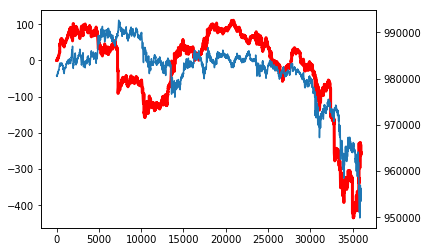

<Figure size 6000x6000 with 0 Axes>

In [33]:
'''
conti LGB learning
'''
pl_kijun = 1000
sim_pl = 100000
future_period = 11
num_term = 20
window_term = 2

train_period = 500
test_period = 60
window_period =  60
num_loop = 10


params = {'objective': 'multiclass','num_class': 4,
          'boosting': 'dart', 'learning_rate': 0.05091528410989798, 'max_bin': 165, 'num_leaves': 207,
          'min_data_in_leaf': 434, 'min_sum_hessian_in_leaf': 9.091797119241134, 'bagging_fraction': 0.9354719699784384, 'bagging_freq': 213, 
          'feature_fraction': 0.20295455889008795, 'lambda_l1': 33.88450440568455, 'lambda_l2': 17.432932544855397, 
          'min_gain_to_split': 34.42381846701762, 'max_depth': 415, 'drop_rate': 0.587272404119674, 'skip_drop': 0.021603140638192186}


OneMinMarketData.initialize_for_bot(num_term, window_term,future_period,pl_kijun,10000)
df = OneMinMarketData.generate_df()
lgbmodel = LgbModel()
train_x, test_x, train_y, test_y = lgbmodel.generate_data(df, 0.0)
ac = SimAccount()
tick_log= []

for i in range(num_loop):
    train_xx = train_x.iloc[i*window_period:i*window_period + train_period]
    train_yy = train_y.iloc[i*window_period:i*window_period + train_period]
    test_xx = train_x.iloc[i*window_period+train_period:i*window_period + train_period+test_period]
    test_yy = train_y.iloc[i*window_period+train_period:i*window_period + train_period+test_period]
    #model = lgbmodel.train_params(train_xx, train_yy,params)
    model = lgbmodel.train(train_xx, train_yy)
    if len(test_yy) > 0:
        predictions = lgbmodel.prediction2(model, test_xx)
        print('test accuracy={}'.format(lgbmodel.calc_buysell_accuracy(predictions,test_yy)))
        start_ind = OneMinMarketData.check_matched_index(test_xx)
        stdata = OneMinMarketData.generate_tick_pred_data(predictions, start_ind)
        tick_log.extend(stdata.price)
        sim = Sim()
        ac = sim.sim_lgbmodel(stdata,sim_pl,ac)
        print('total pl={},num trade={},win rate={}'.format(ac.total_pl,ac.num_trade,ac.win_rate))

fig, ax1 = plt.subplots()
plt.figure(figsize=(30,30),dpi=200)
ax1.plot(ac.performance_total_pl_log,color='red',linewidth = 3.0,label='pl')
ax2 = ax1.twinx()
ax2.plot(tick_log)
plt.show()

In [28]:
multi.gpu_count()

AttributeError: ignored